In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HDFC.xlsx to HDFC (6).xlsx


In [ ]:
import io
hdfc = pd.read_excel(io.BytesIO(uploaded['HDFC.xlsx']))
hdfc = hdfc.set_index("Date")
hdfc = hdfc[['Open','Close']]
hdfc

,Open,Close
Date,,
2021-08-09,1492.000000,1503.900024
2021-08-10,1489.000000,1507.650024
2021-08-11,1514.900024,1494.949951
2021-08-12,1497.000000,1501.400024
2021-08-13,1501.199951,1526.199951
...,...,...
2022-02-02,1511.949951,1531.199951
2022-02-03,1528.750000,1515.349976
2022-02-04,1528.400024,1524.000000


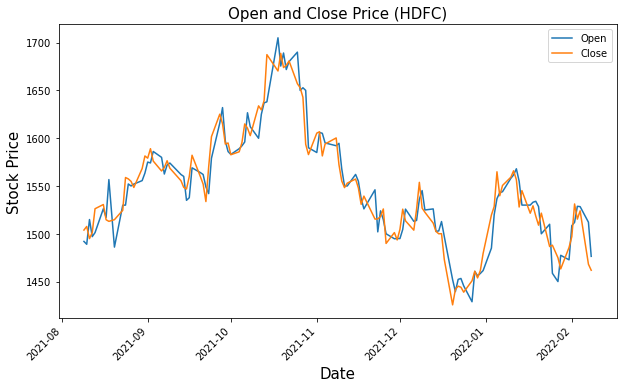

In [ ]:
hdfc[['Open','Close']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Open and Close Price (HDFC)',size=15)
plt.show()

Text(0.5, 1.0, 'Open Price (HDFC)')

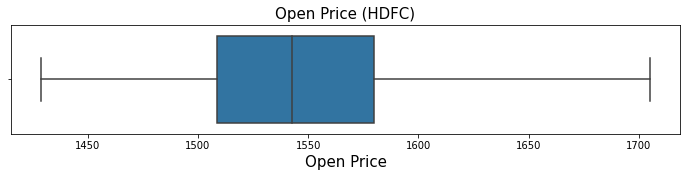

In [ ]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=hdfc['Open'],whis=3.5)
plt.xlabel('Open Price',size=15)
plt.title('Open Price (HDFC)',size=15)

Text(0.5, 1.0, 'Close Price (HDFC)')

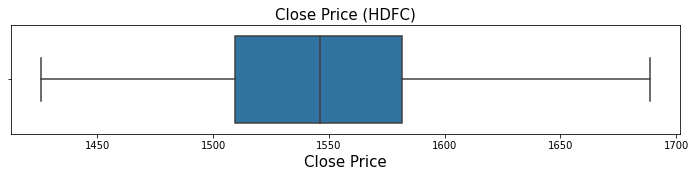

In [ ]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=hdfc['Close'],whis=3.5)
plt.xlabel('Close Price',size=15)
plt.title('Close Price (HDFC)',size=15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
hdfc[hdfc.columns] = Ms.fit_transform(hdfc)

In [ ]:
training_size = round(len(hdfc) * 0.70)
train_data = hdfc[:training_size]
test_data  = hdfc[training_size:]
train_data.shape, test_data.shape

((88, 2), (38, 2))

In [ ]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(10,len(dataset)): # Selecting 10 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((78, 10, 2), (78, 2), (28, 10, 2), (28, 2))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2]))))

model.add(Dropout(0.1)) 
model.add(Bidirectional(LSTM(units=100)))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.build(input_shape = (32,train_seq.shape[1], train_seq.shape[2]))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (32, 10, 200)            82400     
 l)                                                              
                                                                 
 dropout (Dropout)           (32, 10, 200)             0         
                                                                 
 bidirectional_1 (Bidirectio  (32, 200)                240800    
 nal)                                                            
                                                                 
 dense (Dense)               (32, 2)                   402       
                                                                 
Total params: 323,602
Trainable params: 323,602
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=150,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/150
3/3 [==============================] - 11s 878ms/step - loss: 0.1869 - mean_absolute_error: 0.3843 - val_loss: 0.0217 - val_mean_absolute_error: 0.1229
Epoch 2/150
3/3 [==============================] - 0s 51ms/step - loss: 0.0389 - mean_absolute_error: 0.1554 - val_loss: 0.0375 - val_mean_absolute_error: 0.1623
Epoch 3/150
3/3 [==============================] - 0s 51ms/step - loss: 0.0333 - mean_absolute_error: 0.1426 - val_loss: 0.0211 - val_mean_absolute_error: 0.1227
Epoch 4/150
3/3 [==============================] - 0s 51ms/step - loss: 0.0187 - mean_absolute_error: 0.1071 - val_loss: 0.0234 - val_mean_absolute_error: 0.1211
Epoch 5/150
3/3 [==============================] - 0s 49ms/step - loss: 0.0301 - mean_absolute_error: 0.1351 - val_loss: 0.0221 - val_mean_absolute_error: 0.1175
Epoch 6/150
3/3 [==============================] - 0s 52ms/step - loss: 0.0233 - mean_absolute_error: 0.1162 - val_loss: 0.0199 - val_mean_absolute_error: 0.1189
Epoch 7/150
3/3 [=========

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.05597933, 0.07037547],
       [0.07366236, 0.09324938],
       [0.13259116, 0.15666746],
       [0.253605  , 0.28321958],
       [0.30545264, 0.34627578]], dtype=float32)

In [ ]:
test_inverse_predicted = Ms.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1444.356 , 1444.1622],
       [1449.2383, 1450.1793],
       [1465.5084, 1466.8615],
       [1498.9204, 1500.1509],
       [1513.2355, 1516.7378]], dtype=float32)

In [ ]:
import io
hdfc = pd.read_excel(io.BytesIO(uploaded['HDFC.xlsx']))
hdfc = hdfc.set_index("Date")
hdfc = hdfc[['Open','Close']]
hdfc

,Open,Close
Date,,
2021-08-09,1492.000000,1503.900024
2021-08-10,1489.000000,1507.650024
2021-08-11,1514.900024,1494.949951
2021-08-12,1497.000000,1501.400024
2021-08-13,1501.199951,1526.199951
...,...,...
2022-02-02,1511.949951,1531.199951
2022-02-03,1528.750000,1515.349976
2022-02-04,1528.400024,1524.000000


In [ ]:
hdfc = pd.concat([hdfc.iloc[-28:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],index=hdfc.iloc[-28:].index)], axis=1)
hdfc

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2021-12-30,1458.500000,1461.500000,1444.355957,1444.162231
2021-12-31,1461.500000,1479.400024,1449.238281,1450.179321
2022-01-03,1485.000000,1519.650024,1465.508423,1466.861450
2022-01-04,1520.000000,1528.550049,1498.920410,1500.150879
2022-01-05,1536.800049,1564.849976,1513.235474,1516.737793
2022-01-06,1543.000000,1539.750000,1546.335693,1550.954956
2022-01-07,1544.000000,1550.550049,1544.220581,1552.010132
2022-01-10,1558.000000,1559.150024,1550.804077,1559.489746
2022-01-11,1561.550049,1565.900024,1554.592163,1563.879150


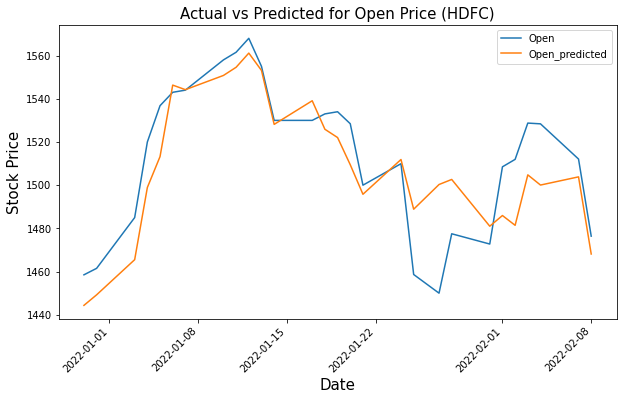

In [ ]:
hdfc[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Open Price (HDFC)',size=15)
plt.show()

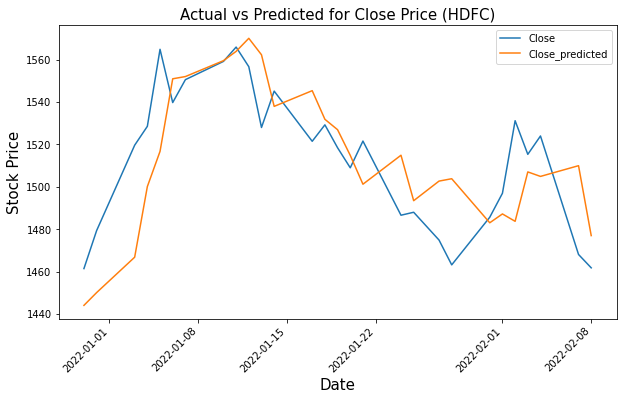

In [ ]:
hdfc[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close Price (HDFC)',size=15)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(hdfc['Open'], hdfc['Open_predicted'])).round(2)
mape = np.round(np.mean(np.abs(hdfc['Open']-hdfc['Open_predicted'])/hdfc['Open'])*100,2)

tempResults = pd.DataFrame({'Method':['Vanilla LSTM'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Vanilla LSTM,18.57,0.97


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(hdfc['Close'], hdfc['Close_predicted'])).round(2)
mape = np.round(np.mean(np.abs(hdfc['Close']-hdfc['Close_predicted'])/hdfc['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Vanilla LSTM'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Vanilla LSTM,25.15,1.31
